### Analyzing the Stroop Effect
Perform the analysis in the space below. Remember to follow [the instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True) and review the [project rubric](https://review.udacity.com/#!/rubrics/71/view) before submitting. Once you've completed the analysis and write-up, download this file as a PDF or HTML file, upload that PDF/HTML into the workspace here (click on the orange Jupyter icon in the upper left then Upload), then use the Submit Project button at the bottom of this page. This will create a zip file containing both this .ipynb doc and the PDF/HTML doc that will be submitted for your project.


(1) What is the independent variable? What is the dependent variable?

### Answer for question 1:


- The independent variable is the: **(stimulus)** or in this case the presentation of a word in letters describing a color in either the matching font color (i.e., a congruent presentation) or a non matching font color (i.e., an incongruent presentation) 


- The dependent variable, on he other hand, is the: **(response)** or in this case the reaction time, also called the: *(interference score)* in this experiment, which is the amount of time it takes a subject (i.e., a person), to enunciate the actual font or ink color of a displayed word of a color. For example, if the word 'PINK' is displayed in blue ink or font, the dependent variable or rsponse, is the time it takes a subject to enunciate the word blue from the time the word is shown to the subject even though the written word says "PINK".


(2) What is an appropriate set of hypotheses for this task? Specify your null and alternative hypotheses, and clearly define any notation used. Justify your choices.

### Answer for question 2:

- H$_0$ =  Null hypothesis
- H$_A$ =  Alternate hypothesis
- u$_c$ =  mean response time of the congruent presentation (font color matches the word color description)
- u$_i$ =  mean response time of the incongruent presentation (font color does not match the word color description)

---

The Null hypothesis: the congruent presentation mean repsonse time equals the incogruent presentation mean response time

H$_0$ :    u$_c$   =     u$_i$ 

---

The Alternative hypothesis: the congruent presentation mean response time does not equal the incongruent presentation mean response time

H$_A$:     u$_c$   ≠      u$_i$   


---


- When each participant is tested under both conditions (congruency) and (incongruency) a one tailed ttest_rel is selected to ascertain if the differences in the means of the two groups of responses are statistically significant. 

(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

### Answer for Question 3:

In [1]:
# Perform the analysis here
import os
import math
import random
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plot
import statistics as st
from scipy import stats
from scipy.stats import t
np.random.seed(2019)

df = pd.read_csv('stroopdata.csv')
print('Congruent values mean =', round(df['Congruent'].mean(),4),'Congruent values Std = ', round(df['Congruent'].std(),4))
print('Incongruent values mean =', round(df['Incongruent'].mean(),4),'Incongruent values Std = ', round(df['Incongruent'].std(),4))
df;

Congruent values mean = 14.0511 Congruent values Std =  3.5594
Incongruent values mean = 22.0159 Incongruent values Std =  4.7971


In [2]:
# Get mean and std for both test results
print('Congruent values mean =', round(df['Congruent'].mean(),4),'Congruent values Std = ', round(df['Congruent'].std(),4))
print('Incongruent values mean =', round(df['Incongruent'].mean(),4),'Incongruent values Std = ', round(df['Incongruent'].std(),4))


Congruent values mean = 14.0511 Congruent values Std =  3.5594
Incongruent values mean = 22.0159 Incongruent values Std =  4.7971


(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

### Answer for Question 4, pt 1:

- Plot of the Data Frame = df, 'Congruent' column data below, has a mean of aproximatley 14 and has a Gaussian or normal shape distribution

Text(0,0.5,'Frequency of responses')

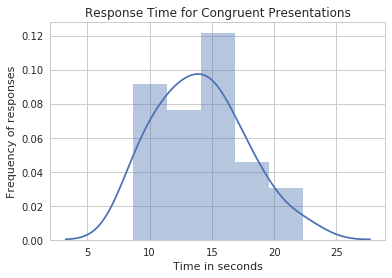

In [3]:
# apply the plot background
sns.set(style="whitegrid")

# plot the distribution of the Congruent Presentations variable 
sns.distplot(df['Congruent'])
plot.title('Response Time for Congruent Presentations')
plot.xlabel('Time in seconds')
plot.ylabel('Frequency of responses')


### Answer for Question 4,  part 2:

- The plot of the Data Frame = df, 'Incongruent' column, data has a bimodal distribution with each mode having a Gassian or normal shaped distribution.


- The larger mode to the left has a mean of aproximately 20 and the smaller mode to the right has a mean of approximately 35.

Text(0,0.5,'Frequency of responses')

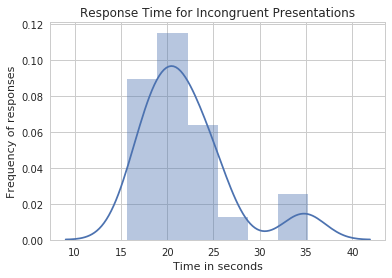

In [4]:
# apply the plot background
sns.set(style="whitegrid")

# plot the distribution of the Incongruent Presentations variable
sns.distplot(df['Incongruent'])
plot.title('Response Time for Incongruent Presentations')
plot.xlabel('Time in seconds')
plot.ylabel('Frequency of responses')

(5)  Now, perform the statistical test and report your results. What is your confidence level or Type I error associated with your test? What is your conclusion regarding the hypotheses you set up? Did the results match up with your expectations? **Hint:**  Think about what is being measured on each individual, and what statistic best captures how an individual reacts in each environment.

### Answer for question 5, part 1 & 2 :

In [5]:
import random
from scipy.stats import t

# show the degrees of freedom
print('Degrees of freedom =', len(df)-1)

# Calculte the difference in means between the congruent and incongruent presentations rounded to four places
print('Difference in Means =', abs(round(df['Congruent'].mean(),4) - round(df['Incongruent'].mean(),4)))

# Calculte the difference in standard deviations between the congruent and incongruent presentations rounded 
# to four places
print('Difference in Stds =', abs(round(df['Incongruent'].std() -df['Congruent'].std(),4)))

# Desired Alpha or Type I error rate
print('The desired Alpha rate or type I error rate = ', 0.01, 'or said differently, the confidence level is 0.99')
Alpha = np.float(0.01)
print('Alpha = ', Alpha)
# 
limits = 1 - Alpha
print('Limits = ', limits, round(1 - limits,3))

# set seed       
np.random.seed(2019)
                                  
# apply the stats.ttest_rel function for "Calculates the T-test on TWO RELATED samples of scores, a and b."
print(stats.ttest_rel(df['Congruent'],df['Incongruent'],axis=0))

# assign names to values
t = -8.020706944109957 
p = (4.1030005857111781e-08 / 2)

# Comparison of the T-statistic and p-value of a one tail distribution
t >= p


Degrees of freedom = 23
Difference in Means = 7.9648
Difference in Stds = 1.2377
The desired Alpha rate or type I error rate =  0.01 or said differently, the confidence level is 0.99
Alpha =  0.01
Limits =  0.99 0.01
Ttest_relResult(statistic=-8.020706944109957, pvalue=4.1030005857111781e-08)


False

### Answer to question 5 part 3:
#### My analysis of the results of the the hypothesis test that was set up is:

-  Since the calculated t-statistic is less than the p-value we reject the Null hyposthesis because the difference between the congruent and incongruent response time means is not likely due to chance and therefore the difference is significant.

(6) Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

### Answer to question 6:

- In this situation I believe the brain has two automation processes going on simultaneously which are in competion with each other and depending on the instructions given verbally to the test taker the brain must override one of the two automatic responses to stimuli it has been presented with which causes a delay in decision making by a magnitude of approximatley 8 seconds.

- A similar task in my view would be driving a vehicle while texting. 

- People who are texting while driving are often unable to safely keep control of their vehicles and wind up in auto accidents because of delays in reaction time caused by competing stimuli to the brain.

### References:

- https://seaborn.pydata.org/tutorial.html

- https://en.wikipedia.org/wiki/Standard_error

- https://en.wikipedia.org/wiki/Critical_value

- https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True

- http://eric.univ-lyon2.fr/~ricco/tanagra/fichiers/en_Tanagra_Calcul_P_Value.pdf

- https://www.itl.nist.gov/div898/handbook/eda/section3/eda3672.htm

- https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html

- https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.t.html

- https://github.com/deepak525/Test-a-Perceptual-Phenomenon/blob/master/Test_a_Perceptual_Phenomenon.ipynb

- https://github.com/latinacode/Test-a-Perceptual-Phenomenon/blob/master/Test%20a%20Perceptual%20Phenomenon.ipynb

- https://github.com/j450h1/P1-Test-a-Perceptual-Phenomenon/blob/master/Project%20Questions.ipynb

- https://github.com/abodacs/Test-a-Perceptual-Phenomenon/blob/master/Test%20a%20Perceptual%20Phenomenon.ipynb

- https://ryanwingate.com/assets/projects/Stroop_Effect_Analysis.html

- https://github.com/SThornewillvE/Udacity-Project---Test-a-perceptual-phenomenon/blob/master/Test-a-Perceptual-Phenomenon.ipynb

- https://github.com/kanhua/Udacity-DA-projects/blob/master/Test%20a%20Perceptual%20Phenomenon/Test%20a%20perceptual%20phenomenon.ipynb